In [44]:
from scipy import *
import numpy as np
from pylab import *
from scipy.interpolate import interp1d
import os
from astropy.io import fits
from scipy.special import factorial
%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 1779


In [25]:
######## check TT, Pk (z=0), Clkk (z=1) from class vs camb

# cosmological parameters
A_s = 2.1e-9
OmegaB = 0.046
OmegaM = 0.3
h=0.7
n_s = 0.97
tau = 0.054
w=-1.0

In [67]:
####### class
## https://github.com/lesgourg/class_public/blob/master/explanatory.ini
# 1.a) list of output spectra requested:
# - 'tCl' for temperature Cls,
# - 'pCl' for polarization Cls,
# - 'lCl' for CMB lensing potential Cls,
# - 'nCl' (or 'dCl') for density number count Cls,
# - 'sCl' for galaxy lensing potential Cls,
# - 'mPk' for total matter power spectrum P(k) infered from gravitational potential,
# - 'dTk' (or 'mTk') for density transfer functions for each species,
# - 'vTk' for velocity transfer function for each species.

# import classy module
from classy import Class
# create instance of the class "Class"
LambdaCDM = Class()
LambdaCDM.set({'omega_b':OmegaB*h**2,'omega_cdm':OmegaM*h**2,'h':h,'A_s':A_s,'n_s':n_s,'tau_reio':tau})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk,sCl',
               'lensing':'yes',
               'P_k_max_1/Mpc':10.0,
               'z_pk':0,
               'l_switch_limber':100,
               'selection':'dirac',
               'selection_mean':1.0,
               'l_max_lss':5000,
               #'l_switch_limber_for_nc_local_over_z':10000, 
               #'l_switch_limber_for_nc_los_over_z':2000,
               'perturb_sampling_stepsize':0.01})
# run class
LambdaCDM.compute()

In [68]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
print cls.viewkeys()
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

dict_keys(['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te'])


In [69]:
# get P(k) at redhsift z=0
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

In [70]:
# get Clkk
cls2=LambdaCDM.density_cl(5000)
print cls2.viewkeys()
ell=cls2['ell'][2:]
clphiphi=cls2['ll'][0][2:]
#clkk=1.0/4 * ((l+2.0)!/(l-2.0)!)* clphiphi
#clkk=1.0/4 * (factorial(ell+2.0)/factorial(ell-2.0))*clphiphi
clkk=1.0/4 * (ell+2.0)*(ell+1.0)*(ell)*(ell-1.0)*clphiphi

dict_keys(['ll', 'ell'])


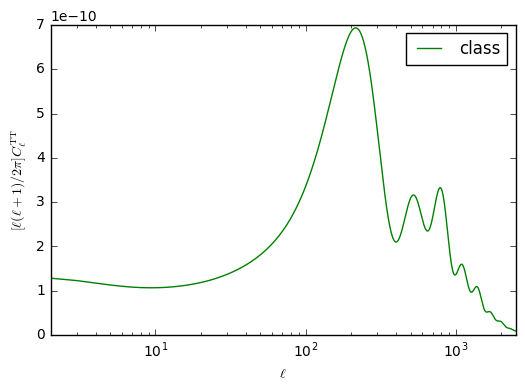

In [71]:
# plot C_l^TT
figure(1)
xscale('log');plt.yscale('linear');plt.xlim(2,2500)
xlabel(r'$\ell$')
ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plot(ll,clTT*ll*(ll+1)/2./pi,'g-',label='class')
legend()

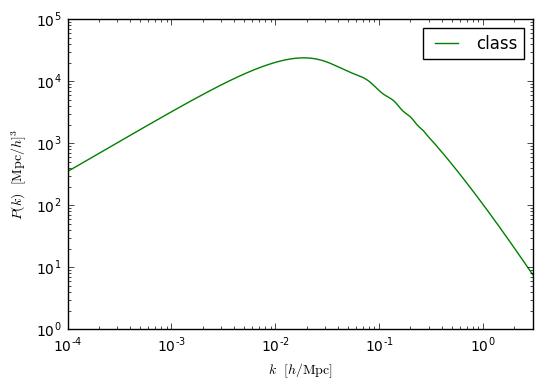

In [72]:
# plot P(k)
figure(2)
xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plot(kk,Pk,'g-',label='class')
legend()

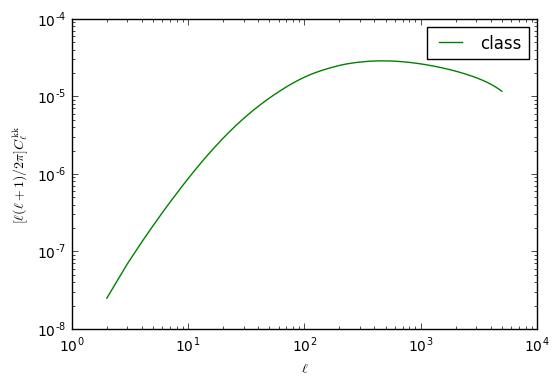

In [74]:
# plot C_l^TT
figure(3)
xscale('log');yscale('log');#xlim(2,2500)
xlabel(r'$\ell$')
ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{kk}$')
plot(ell,clkk*ell*(ell+1)/2./pi,'g-',label='class')
legend(loc=0)